In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style untuk visualisasi
plt.style.use('seaborn-v0_8')
sns.set_theme()

In [3]:
def load_data(file_path):
    """
    Membaca dan membersihkan data
    """
    raw_df = pd.read_csv(file_path)
    likert_columns = [col for col in raw_df.columns if col.startswith(tuple(str(i)+'.' for i in range(1,18)))]
    data = raw_df[likert_columns]
    
    # Mengelompokkan pertanyaan
    question_groups = {
        'Identitas Nasional': likert_columns[:3],
        'Pengaruh Globalisasi': likert_columns[3:5],
        'Adaptasi Budaya': likert_columns[5:8],
        'Peran Pendidikan': likert_columns[8:12],
        'Peran Teknologi': likert_columns[12:17]
    }
    
    return data, raw_df, question_groups

In [4]:
def analyze_demographics(raw_df):
    """
    Analisis demografis responden
    """
    print("=== ANALISIS DEMOGRAFIS ===")
    
    # Analisis Jenis Kelamin
    gender_dist = raw_df['Apa jenis kelamin anda?'].value_counts()
    print("\nDistribusi Jenis Kelamin:")
    print(gender_dist)
    
    # Analisis Usia
    age_stats = raw_df['Berapa usia anda saat ini?'].describe()
    print("\nStatistik Usia:")
    print(age_stats)
    
    # Visualisasi demografis
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot Jenis Kelamin
    gender_dist.plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title('Distribusi Jenis Kelamin')
    ax1.set_ylabel('Jumlah')
    ax1.set_xticklabels(gender_dist.index, rotation=0)
    
    # Plot Usia
    sns.histplot(raw_df['Berapa usia anda saat ini?'], ax=ax2, bins=10)
    ax2.set_title('Distribusi Usia')
    
    plt.tight_layout()
    plt.show()

In [5]:
def analyze_groups(data, question_groups):
    """
    Analisis per kelompok pertanyaan
    """
    print("\n=== ANALISIS PER KELOMPOK PERTANYAAN ===")
    
    group_stats = {}
    for group_name, questions in question_groups.items():
        group_data = data[questions]
        group_stats[group_name] = {
            'mean': group_data.mean().mean(),
            'std': group_data.mean().std(),
            'max_question': group_data.mean().idxmax(),
            'min_question': group_data.mean().idxmin()
        }
        
        print(f"\n{group_name}:")
        print(f"Rata-rata: {group_stats[group_name]['mean']:.2f}")
        print(f"Pertanyaan tertinggi: {group_stats[group_name]['max_question']}")
        print(f"Pertanyaan terendah: {group_stats[group_name]['min_question']}")
    
    return group_stats

In [6]:
def visualize_groups(data, question_groups):
    """
    Visualisasi kelompok pertanyaan
    """
    plt.figure(figsize=(15, 6))
    group_means = []
    group_names = []
    
    for group_name, questions in question_groups.items():
        group_mean = data[questions].mean().mean()
        group_means.append(group_mean)
        group_names.append(group_name)
    
    bars = plt.bar(group_names, group_means, color=sns.color_palette("husl", len(group_names)))
    plt.title('Rata-rata Nilai per Kelompok Pertanyaan')
    plt.ylabel('Rata-rata Nilai')
    plt.xticks(rotation=45)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

In [7]:
def analyze_correlations(data, question_groups):
    """
    Analisis korelasi
    """
    print("\n=== ANALISIS KORELASI ===")
    
    # Korelasi antar kelompok
    group_means = {group: data[questions].mean(axis=1) 
                  for group, questions in question_groups.items()}
    correlation_df = pd.DataFrame(group_means)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', 
                fmt='.2f', square=True)
    plt.title('Korelasi antar Kelompok Pertanyaan')
    plt.tight_layout()
    plt.show()
    
    return correlation_df.corr()

In [8]:
def analyze_distributions(data, question_groups):
    """
    Analisis distribusi jawaban
    """
    plt.figure(figsize=(20, 10))
    
    current_pos = 0
    positions = []
    labels = []
    
    for group_name, questions in question_groups.items():
        group_data = data[questions]
        
        bp = plt.boxplot([group_data[q] for q in questions],
                        positions=range(current_pos, current_pos + len(questions)),
                        widths=0.6)
        
        positions.extend(range(current_pos, current_pos + len(questions)))
        labels.extend([f'Q{i+1}' for i in range(len(questions))])
        
        current_pos += len(questions) + 1
    
    plt.title('Distribusi Jawaban untuk Setiap Pertanyaan')
    plt.ylabel('Nilai')
    plt.xlabel('Pertanyaan')
    plt.xticks(positions, labels, rotation=45)
    
    # Tambahkan garis pemisah kelompok
    current_pos = 0
    for group_name, questions in question_groups.items():
        current_pos += len(questions)
        if current_pos < len(labels):
            plt.axvline(x=current_pos - 0.5, color='gray', linestyle='--', alpha=0.5)
            plt.text(current_pos - len(questions)/2, plt.ylim()[1], 
                    group_name, ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


In [9]:
def generate_summary(data):
    """
    Menghasilkan ringkasan analisis
    """
    print("\n=== RINGKASAN ANALISIS ===")
    
    # Statistik umum
    print("\nStatistik Umum:")
    print(f"Jumlah responden: {len(data)}")
    print(f"Jumlah pertanyaan: {len(data.columns)}")
    
    # Rata-rata keseluruhan
    overall_mean = data.mean().mean()
    print(f"\nRata-rata keseluruhan: {overall_mean:.2f}")
    
    # Pertanyaan dengan nilai tertinggi dan terendah
    highest_q = data.mean().idxmax()
    lowest_q = data.mean().idxmin()
    print(f"\nPertanyaan dengan nilai tertinggi: {highest_q}")
    print(f"Pertanyaan dengan nilai terendah: {lowest_q}")

In [10]:
data, raw_df, question_groups = load_data('kuisioner_cinta_tanah_air.csv')

=== ANALISIS DEMOGRAFIS ===

Distribusi Jenis Kelamin:
Apa jenis kelamin anda?
Laki-laki    12
Perempuan     5
Name: count, dtype: int64

Statistik Usia:
count    17.000000
mean     19.882353
std       1.452685
min      17.000000
25%      19.000000
50%      20.000000
75%      21.000000
max      23.000000
Name: Berapa usia anda saat ini?, dtype: float64


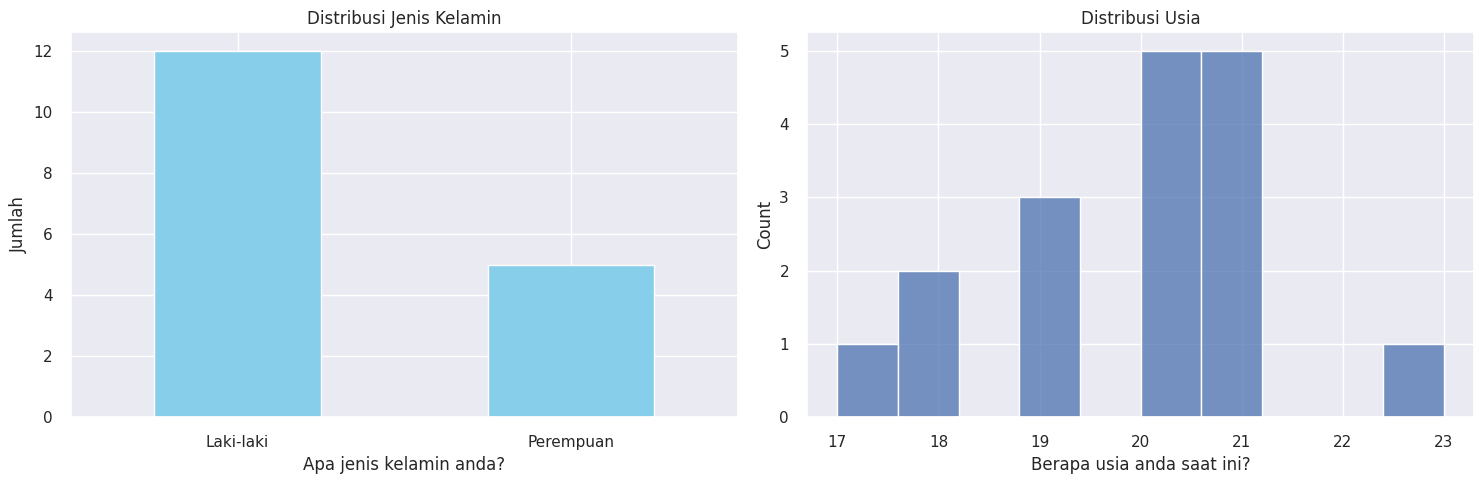

In [11]:
# Analisis Demografi
analyze_demographics(raw_df)

In [12]:
# Analisis per kelompok
group_stats = analyze_groups(data, question_groups)


=== ANALISIS PER KELOMPOK PERTANYAAN ===

Identitas Nasional:
Rata-rata: 4.16
Pertanyaan tertinggi: 1. Menurut anda, seberapa pentingkah identitas nasional bagi kehidupan sehari-hari?
Pertanyaan terendah: 2. Seberapa besar rasa cinta tanah air memengaruhi keputusan anda dalam bebagai aspek (misalnya, dalam memilih produk lokal)?

Pengaruh Globalisasi:
Rata-rata: 3.18
Pertanyaan tertinggi: 5. Seberapa besar pengaruh media sosial internasional terhadap pandangan anda tentang budaya dan identitas Indonesia?
Pertanyaan terendah: 4. Apakah anda meerasa bahwa budaya asing lebih menarik dibandingkan budaya Indonesia?

Adaptasi Budaya:
Rata-rata: 3.41
Pertanyaan tertinggi: 7. Apakah anda mendukung program atau inisiatif yang memperkenalkan budaya Indonesia  ke dunia internasional?
Pertanyaan terendah: 6. Apakah anda merasa lebih nyaman menyesuaikan diri dengan budaya internasional dibandingkan budaya lokal?

Peran Pendidikan:
Rata-rata: 3.84
Pertanyaan tertinggi: 11. Apakah anda merasa bahwa 

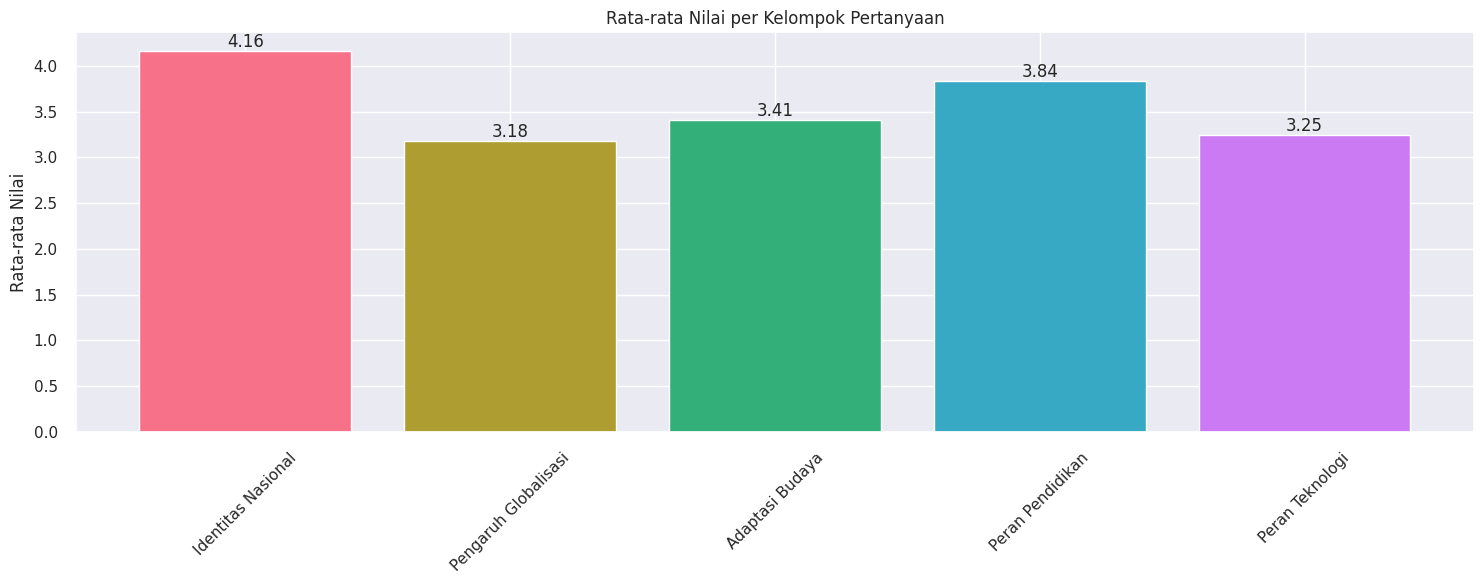

In [13]:
# Visualisasi kelompok
visualize_groups(data, question_groups)


=== ANALISIS KORELASI ===


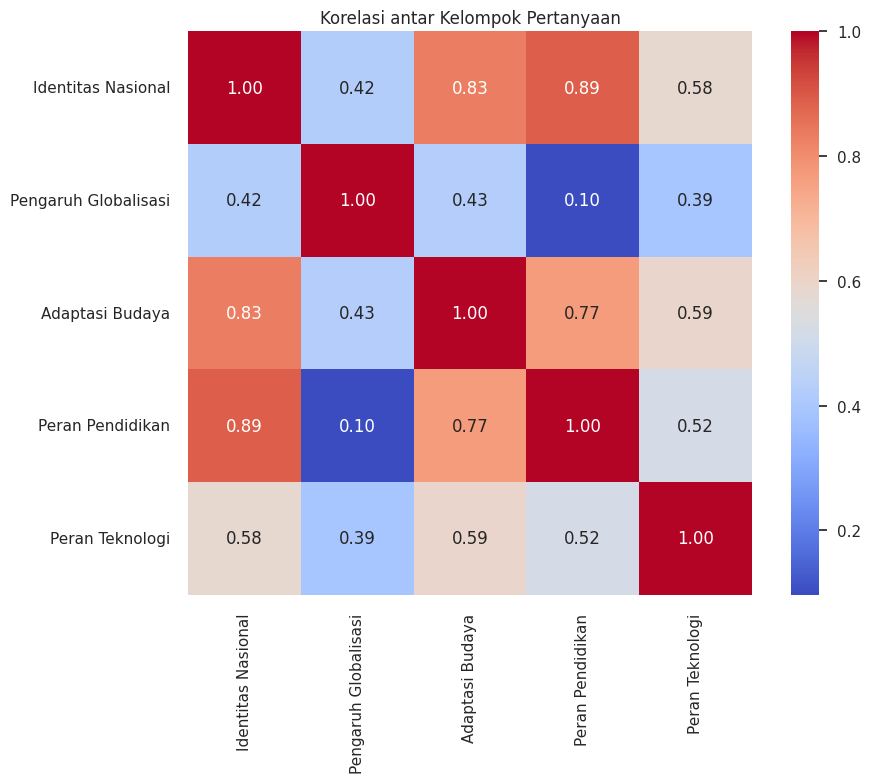

In [14]:
# Analisis korelasi
corr_matrix = analyze_correlations(data, question_groups)

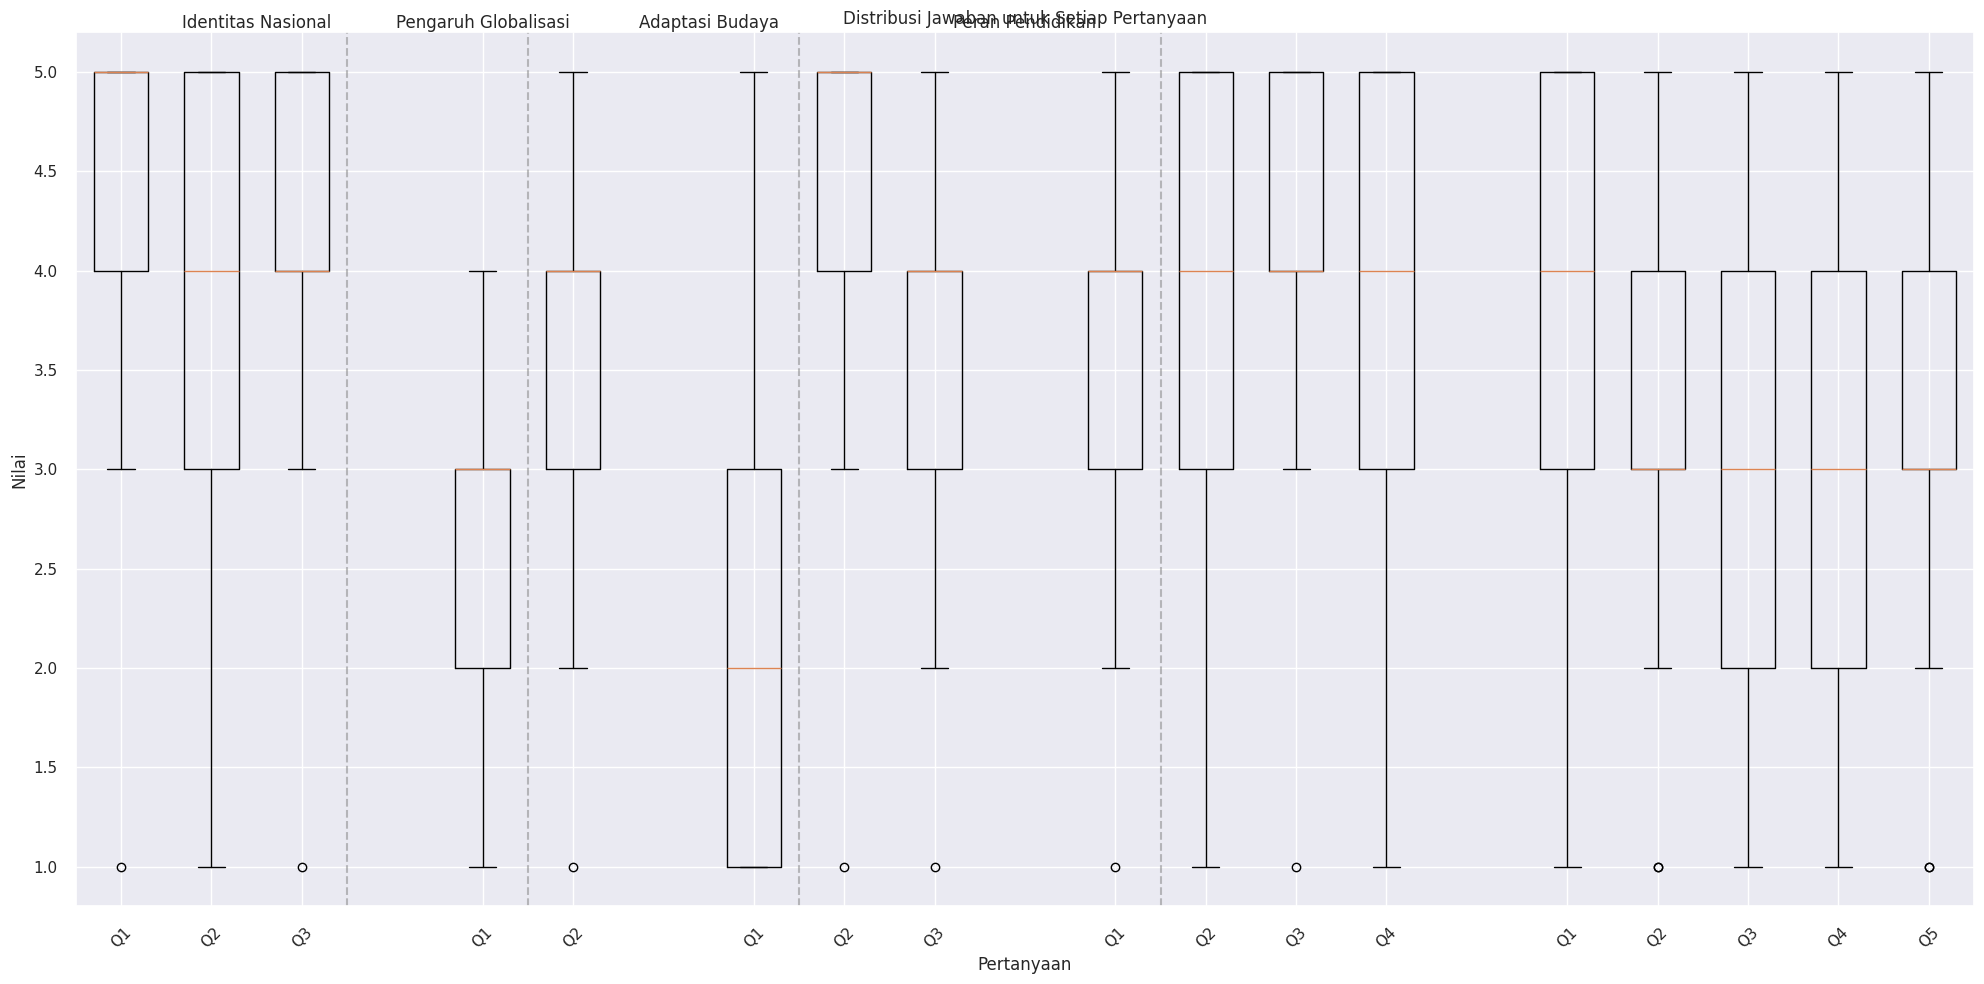

In [15]:
# Analisis distribusi
analyze_distributions(data, question_groups)

In [16]:
# Ringkasan
generate_summary(data)


=== RINGKASAN ANALISIS ===

Statistik Umum:
Jumlah responden: 17
Jumlah pertanyaan: 17

Rata-rata keseluruhan: 3.57

Pertanyaan dengan nilai tertinggi: 1. Menurut anda, seberapa pentingkah identitas nasional bagi kehidupan sehari-hari?
Pertanyaan dengan nilai terendah: 6. Apakah anda merasa lebih nyaman menyesuaikan diri dengan budaya internasional dibandingkan budaya lokal?
